In [134]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objs as go

In [135]:
data = pd.read_csv("iris.csv")

In [136]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [137]:
# Bắt đầu tìm hiểu về các trường dữ liệu 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [138]:
# Tìm hiểu các giá trị của từng trường
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [139]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [140]:
# Xem số lượng dữ liệu null 
null_info =  pd.DataFrame({'Null count: ': data.isnull().sum(),'Null ratio': data.isnull().sum()/len(data)})
null_info.drop('Species',inplace = True)
null_info


,Null count:,Null ratio
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0


In [141]:
# Xem tỉ lệ giữa các loài hoa
print('% Setosa:',format((data.Species=='Iris-setosa').sum()/len(data)*100,'.2f'))
print('% Vesicolor:', format((data.Species=='Iris-versicolor').sum() / len(data) * 100,'.2f'))
print('% Virginica:', format((data.Species=='Iris-virginica').sum() / len(data) * 100,'.2f'))

% Setosa: 33.33
% Vesicolor: 33.33
% Virginica: 33.33


3 Loài hoa này có số lượng như nhau

# Visualization

In [142]:
# Ban nhao cua data de ve va tahy doi du lieu
data1 = data.copy()

## SepalLengthCm

In [143]:
data1.SepalLengthCm.value_counts(dropna = False)

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

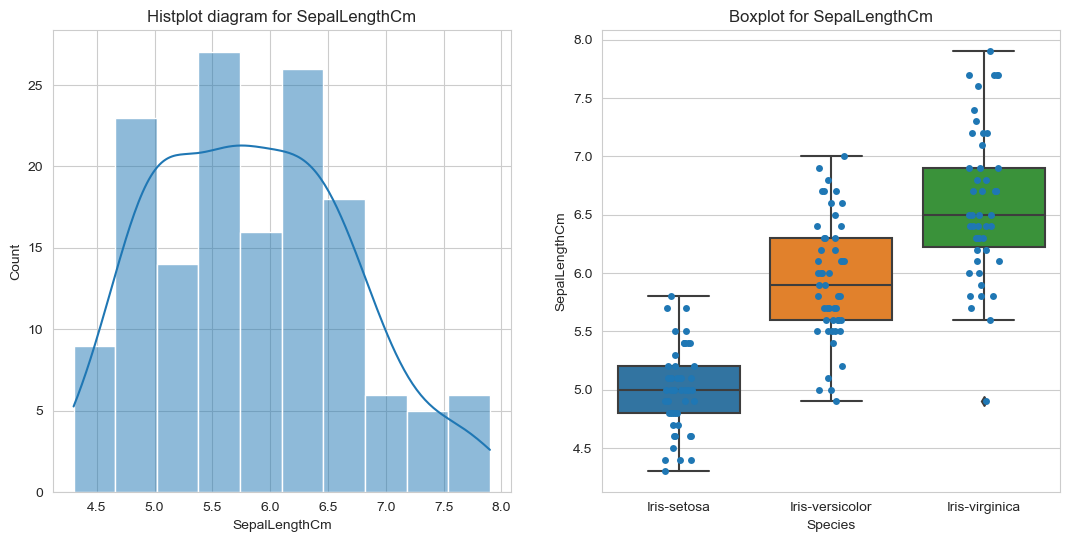

In [144]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.SepalLengthCm, bins=10, kde=True)
plt.title('Histplot diagram for SepalLengthCm')
plt.subplot(1,2,2)
sns.boxplot(x="Species", y="SepalLengthCm", data=data1)
sns.stripplot(x='Species',y='SepalLengthCm',data=data1,jitter=True,edgecolor='gray')
plt.title('Boxplot for SepalLengthCm');

# SepalWidthCm 

In [145]:
data1.SepalWidthCm.value_counts(dropna=False)

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

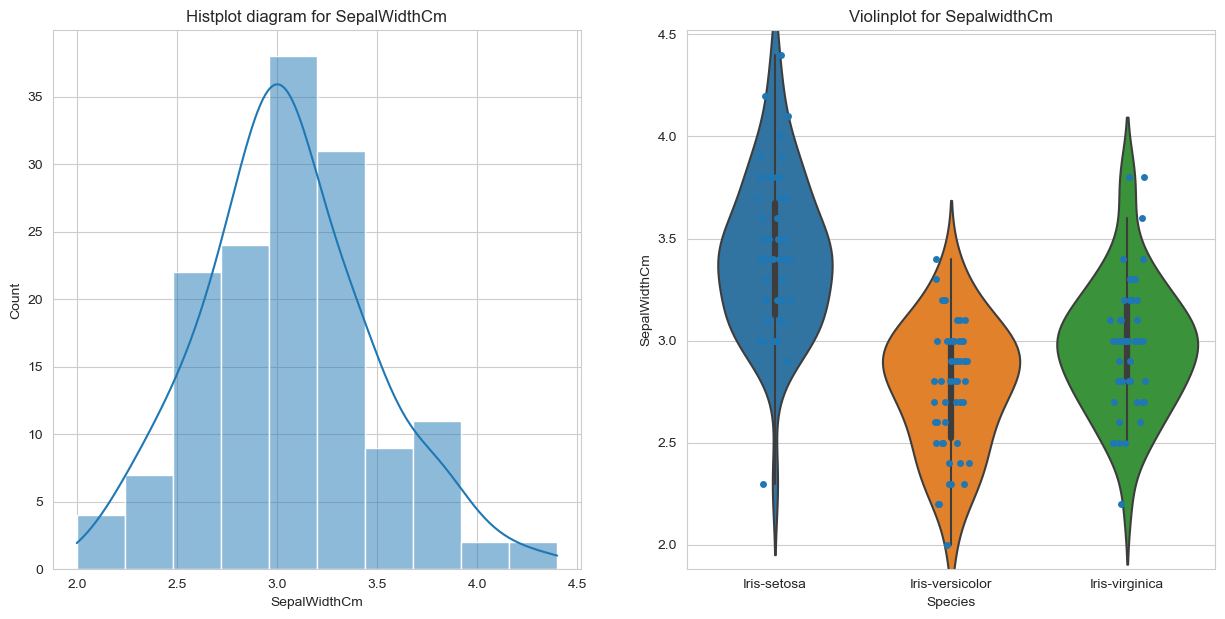

In [146]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data = data1.SepalWidthCm,bins = 10, kde= True)
plt.title("Histplot diagram for SepalWidthCm")
plt.subplot(1,2,2)
sns.violinplot(x = "Species",y = "SepalWidthCm",data=data1,size = 6)
sns.stripplot(x = 'Species',y = 'SepalWidthCm',data=data1,jitter=True,edgecolor ='gray')
plt.title("Violinplot for SepalwidthCm");

 Tất cả phân bố trong tự nhiên nếu không có sự can thiệp quá sâu của con người thì sẽ có dạng phân bố dữ liệu dạng tháp chuông.

### PetalLengthCm

In [148]:
data1.PetalLengthCm.value_counts()

PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64

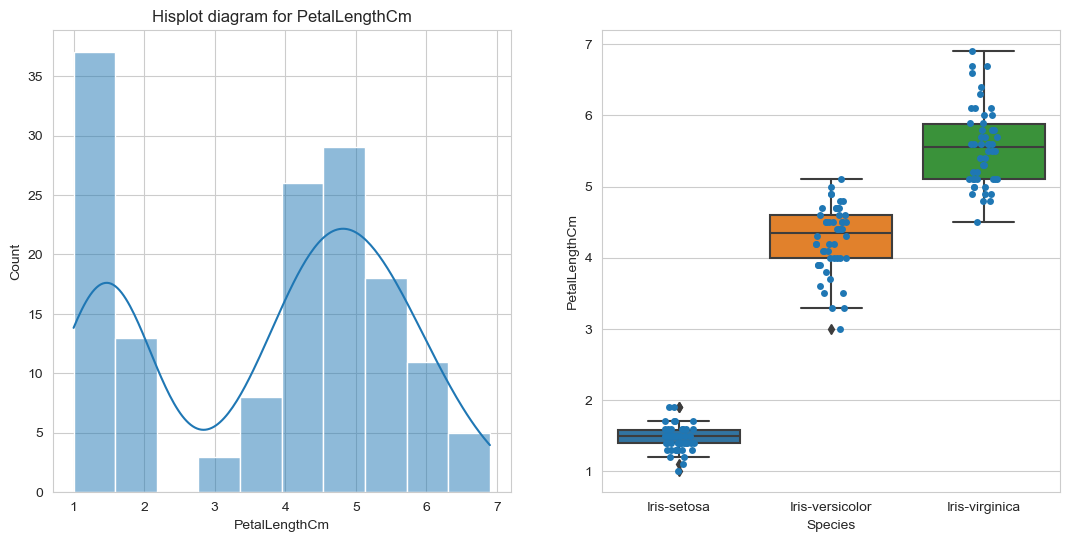

In [149]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data=data1.PetalLengthCm,bins = 10,kde = True)
plt.title("Hisplot diagram for PetalLengthCm")
plt.subplot(1,2,2)
sns.boxplot(data=data1,x="Species",y="PetalLengthCm")
sns.stripplot(data=data1,x="Species",y="PetalLengthCm");

Dữ liệu đã có sự can thiệp của con người cho nên nên xem xét kĩ trước khi được vào mô hình

### PetalWidthCm

In [150]:
data1.PetalWidthCm.value_counts()

PetalWidthCm
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

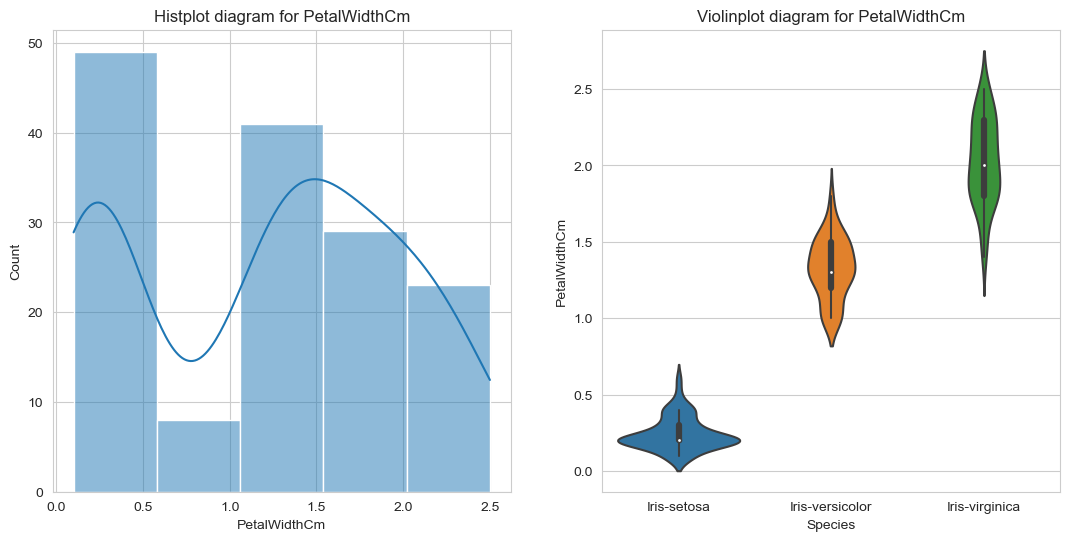

In [151]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data = data1.PetalWidthCm,bins = 5,kde = True)
plt.title("Histplot diagram for PetalWidthCm")
plt.subplot(1,2,2)
sns.violinplot(data = data1, x='Species',y="PetalWidthCm")
plt.title("Violinplot diagram for PetalWidthCm");

### Relationship (Tìm ra mối quan hệ giữa các cột với nhau)

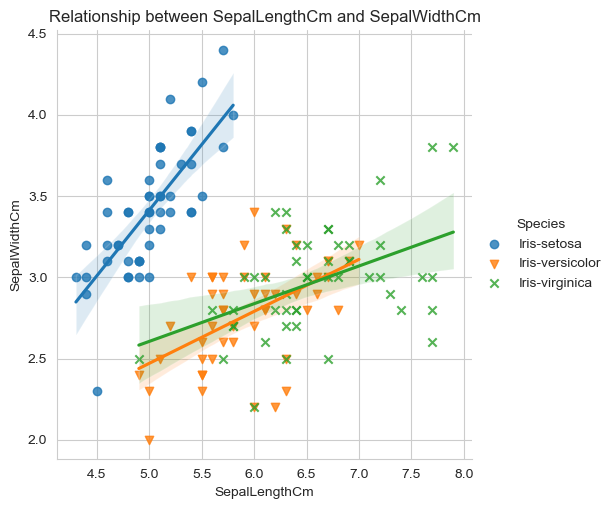

In [152]:
sns.set_style('whitegrid')
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=data1, hue="Species", markers=['o', 'v', 'x'])
plt.title("Relationship between SepalLengthCm and SepalWidthCm");

- Chiều dài của đài hoa và chiều rộng của đài hoa Iris-setorsa có quan hệ gần như là tuyến tính với nhau.
- Có thể phân loại được luôn Iris-setorsa 

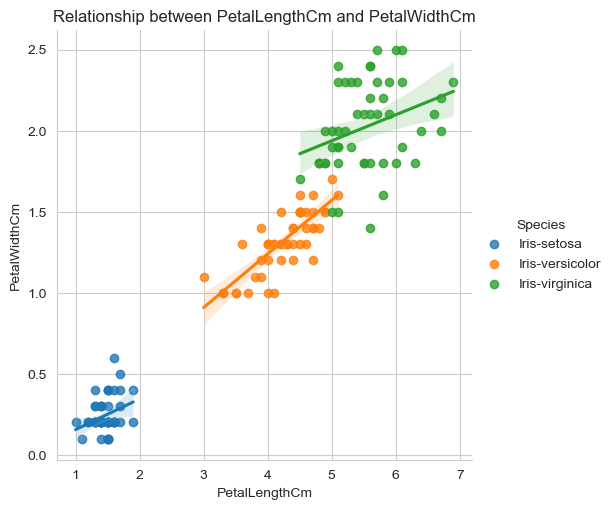

In [153]:
sns.lmplot(data=data1,x="PetalLengthCm",y="PetalWidthCm",hue="Species")
plt.title("Relationship between PetalLengthCm and PetalWidthCm");

Có thể dễ dàng phân biệt hoa Iris-setosa với các loài hoa còn lại 

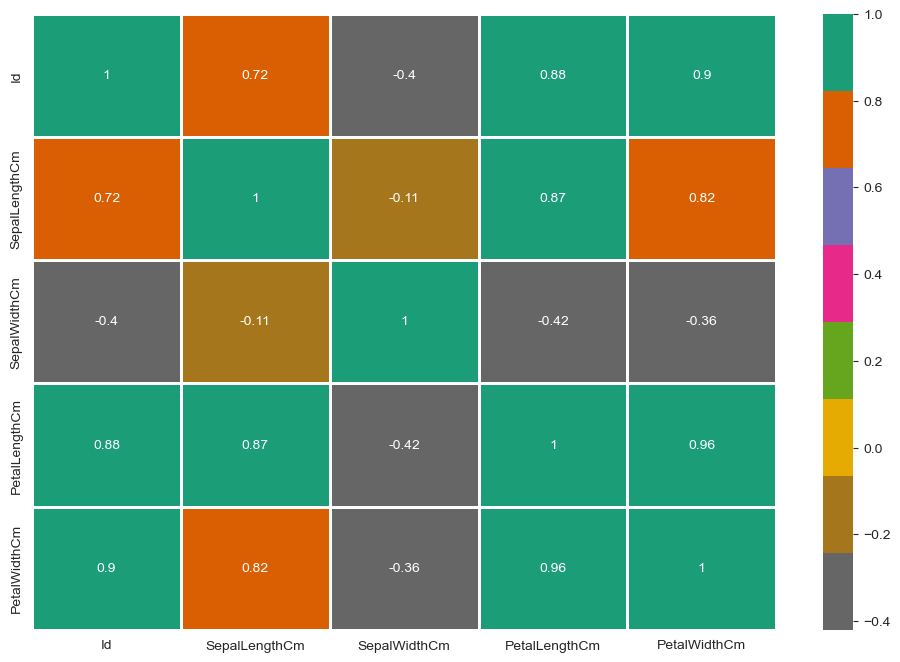

In [154]:
data2 = data1.drop("Species",axis = 1)
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

- các ô có giá trị 1,-1 các ô có quan hệ tuyến tính.
- '>0: quan hệ đồng biến.
- <0: quan hệ nghịch biến.


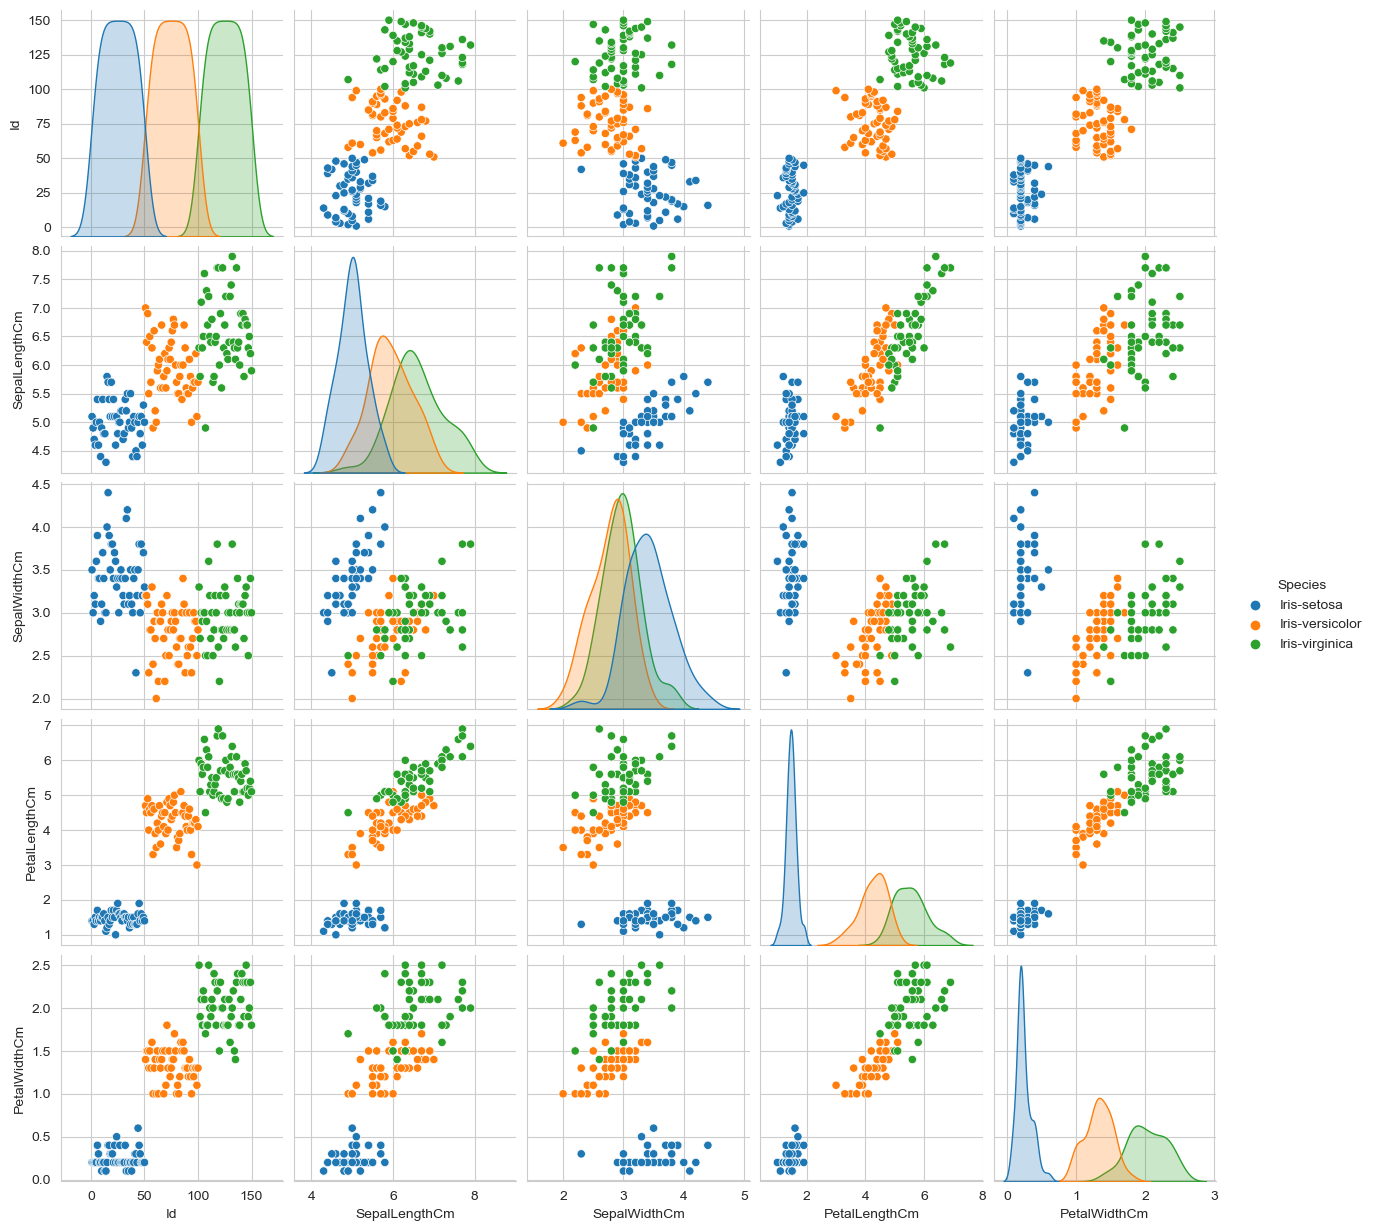

In [155]:
# Biểu đồ so sánh quan hệ giữa các cặp thuộc tính phân chia theo loài hoa
sns.pairplot(data=data1,hue="Species");

### Applied Algorithms

In [156]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score 
# make_scorer:hàm tính điểm dựa trên các phép đo khác nhau, chẳng hạn như accuracy, precision, recall, F1-score
#accuracy_score: Hàm này tính toán độ chính xác của mô hình phân loại bằng cách so sánh dự đoán với nhãn thực tế
#precision_score: Đo lường khả năng của mô hình phân loại trong việc đưa ra dự đoán dương tính (positive) chính xác: precision = TP / (TP + FP)
#recall_scoreĐo lường khả năng của mô hình phân loại trong việc bắt lấy tất cả các trường hợp dương tính: recall = TP / (TP + FN)
from sklearn.metrics import classification_report
#classification_report: Hàm này tạo một báo cáo tổng hợp về hiệu suất của mô hình phân loại, bao gồm precision, recall, F1-score và hỗn hợp các thông số khác cho từng lớp trong bài toán phân loại.
from sklearn.metrics import confusion_matrix
#confusion_matrix: Hàm này tạo ma trận nhầm lẫn (confusion matrix) để biểu thị sự phân phối của các dự đoán đúng và sai trong mô hình phân loại. Ma trận này thường bao gồm các ô như TP, FP, TN, và FN để xác định hiệu suất của mô hình.
from sklearn.metrics import recall_score,f1_score
# f1_score: F1-score là một phép đo kết hợp giữa precision và recall, thường được sử dụng khi bạn muốn cân nhắc cả hai khía cạnh này. F1-score được tính bằng công thức: F1 = 2 * (precision * recall) / (precision + recall).

In [157]:
#Model Selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [158]:
data.drop(columns="Id",inplace=True)

In [167]:
# chia tách đặc trưng và nhãn
x=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [168]:
#Mã hoá nhãn: LableEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [169]:
# chia dữ liệu train và test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Naive Bayes
.fit(x_train,y_train): sử dụng để huấn luyện mô hình

.predict(x_test): dự đonas đầu ra của mô hình

In [185]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train) #Huấn luyện mô hình
y_pred = gaussian.predict(x_test)
accuracy_nb = round(accuracy_score(y_test,y_pred)*100,2)
acc_gausian =  round(gaussian.score(x_train,y_train)*100,2)

accuracy=accuracy_nb
cm= confusion_matrix(y_test,y_pred)
precision =  precision_score(y_test,y_pred,average='micro')*100
recall = recall_score(y_test,y_pred,average='micro')*100
f1 = f1_score(y_test,y_pred,average='micro')*100
print('Confusion matrix for Naive Bayes \n',cm)
print('Accuracy Naive Bayes:',accuracy,'%')
print('Precision Naive Bayes:',precision,'%')
print('Recall Naive Bayes:',recall,'%')
print('F1 Naive Bayes:',f1,'%');

Confusion matrix for Naive Bayes 
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy Naive Bayes: 100.0 %
Precision Naive Bayes: 100.0 %
Recall Naive Bayes: 100.0 %
F1 Naive Bayes: 100.0 %


## Decison Tree

In [196]:
DTree = DecisionTreeClassifier()
DTree.fit(x_train,y_train)
y_pred = DTree.predict(x_test)
accuracy_dt=round(accuracy_score(y_test,y_pred)*100,2)
acc_Dtree = round(accuracy_score(y_test,y_pred)*100,2)

accuracy=round(accuracy_score(y_test,y_pred)*100,2)
cm= confusion_matrix(y_test,y_pred)
precision =  round(precision_score(y_test,y_pred,average='micro')*100,2)
recall = round(recall_score(y_test,y_pred,average='micro')*100,2)
f1 = round(f1_score(y_test,y_pred,average='micro')*100,2)
print('Confusion matrix for Naive Bayes \n',cm)
print('Accuracy Naive Bayes:',accuracy,'%')
print('Precision Naive Bayes:',precision,'%')
print('Recall Naive Bayes:',recall,'%')
print('F1 Naive Bayes:',f1,'%');

Confusion matrix for Naive Bayes 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Naive Bayes: 97.78 %
Precision Naive Bayes: 97.78 %
Recall Naive Bayes: 97.78 %
F1 Naive Bayes: 97.78 %


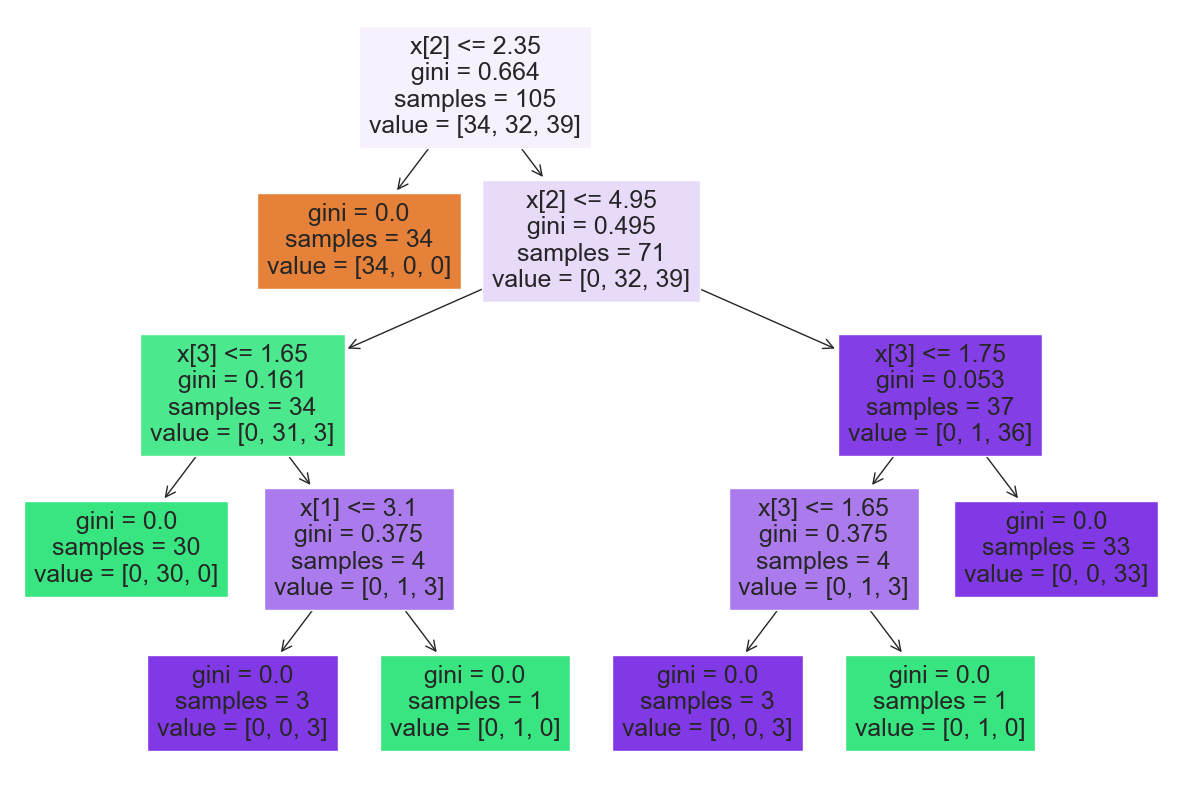

In [200]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(DTree.fit(x_train, y_train)  ,filled=True)
plt.show()

## Random Forest

In [202]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.978
precision_random_Forest : 0.978
recall_random_Forest : 0.978
f1-score_random_Forest : 0.978


## KNN

In [203]:
knn = KNeighborsClassifier(n_neighbors = 3) #chọn 3 điểm dữ liệu gần với dữ liệu đang xét nhất
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


AttributeError: 'Series' object has no attribute 'append'

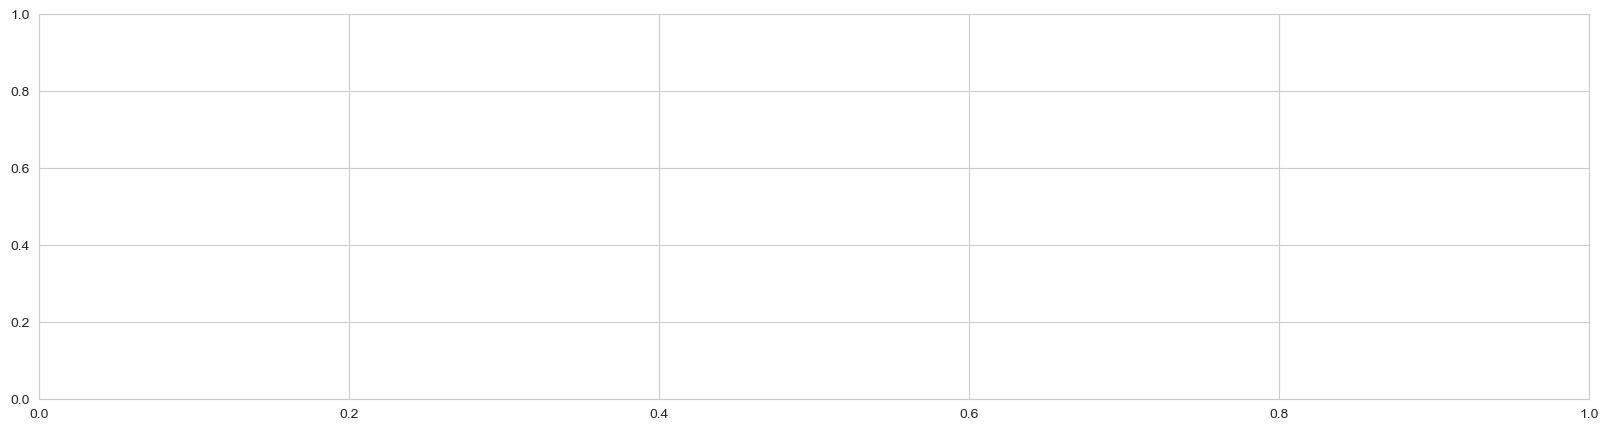

In [206]:
# Với nhiều giá trị của n
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train, y_train) 
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

## MLP

## Support Vector Machine (SVM)

# Find best model